# 第10章 利用K-均值聚类算法对未标注数据分组

本章内容：
- K-均值聚类算法
- 对聚类得到的簇进行后处理
- 二分K-均值聚类算法
- 对地理位置进行聚类

#### 簇识别

**簇识别**给出聚类结果的含义。假定有一些数据，现在将相似数据归到一起，簇识别会告诉我们这些簇到底都是些什么。

聚类与分类的最大不同在于，分类的目标事先已知，而聚类则不一样。因为其产生的结果与分类相同，而只是类别没有预先定义，聚类有时也被称为无监督分类（unsupervised classification）。

## 10.1 K-均值聚类算法

<center>**K-均值聚类**</center>
- 优点：容易实现。
- 缺点：可能收敛到局部最小值，在大规模数据集上收敛较慢。
- 适用数据类型：数值型数据。

<center>**K-均值聚类的一般流程**</center>
1. 收集数据：使用任意方法。
2. 准备数据：需要数值型数据来计算距离，也可以将标称型数据映射为二值型数据再用于距离计算。
3. 分析数据：使用任意方法。
4. 训练算法：不适用于无监督学习，即无监督学习没有训练过程。
5. 测试算法：应用聚类算法、观察结果。可以使用量化的误差指标如误差平方和（后面会介绍）来评价算法的结果。
6. 使用算法：可以用于所希望的任何应用。通常情况下，簇质心可以代表整个簇的数据来做出决策。

##### 程序清单10-1 K-均值聚类支持函数

In [4]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [5]:
datMat = mat(loadDataSet(r'C:\Users\hasee\testSet.txt'))

In [6]:
min(datMat[:,0])

matrix([[-5.379713]])

In [7]:
min(datMat[:,1])

matrix([[-4.232586]])

In [8]:
max(datMat[:,0])

matrix([[ 4.838138]])

In [9]:
max(datMat[:,1])

matrix([[ 5.1904]])

In [10]:
randCent(datMat, 2)

matrix([[ 0.71769475, -1.36486115],
        [ 1.43805802, -1.65933302]])

In [11]:
distEclud(datMat[0], datMat[1])

5.184632816681332

##### 程序清单10-2 K-均值聚类算法

In [13]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [ ]:
while clusterChanged:
    clusterChanged = False
    for i in range(m):
        minDist = inf
        minIndex = -1
        for j in range(k):
            distJI = distEclud(centroids[j,:], datMat[i,:])
            if distJI < minDist:
                minDist = distJI
                minIndex = j
        if clusterAssment[i,0] != minIndex:
            clusterChanged = True
        clusterAssment[i,:] = minIndex.minDist**2
    print(centroids)
    for cent in range(k):
        ptsInClust = datMat[nonzero(clusterAssment[:,0].A==cent)[0]]
        centroids[cent,:] = mean(ptsInClust, axis=0)
    

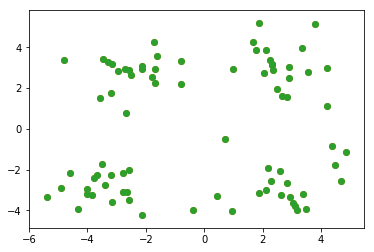

In [34]:
import matplotlib.pyplot as plt
plt.scatter(datMat[:,0].tolist(), datMat[:,1].tolist())
plt.show()

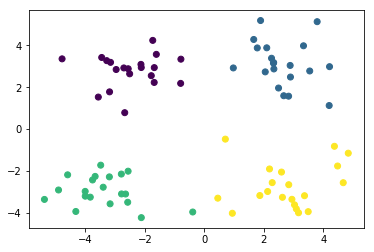

In [48]:
plt.scatter(datMat[:,0].tolist(), datMat[:,1].tolist(), c=clusterAssment[:,0].tolist())
plt.show()

In [42]:
clusterAssment

matrix([[  1.00000000e+00,   2.32019150e+00],
        [  0.00000000e+00,   1.39004893e+00],
        [  3.00000000e+00,   6.63839104e+00],
        [  2.00000000e+00,   4.16140951e+00],
        [  1.00000000e+00,   2.76967820e+00],
        [  0.00000000e+00,   2.80101213e+00],
        [  3.00000000e+00,   5.85909807e+00],
        [  2.00000000e+00,   1.50646425e+00],
        [  1.00000000e+00,   2.29348924e+00],
        [  0.00000000e+00,   6.45967483e-01],
        [  3.00000000e+00,   1.74010499e+00],
        [  2.00000000e+00,   3.77769471e-01],
        [  1.00000000e+00,   2.51695402e+00],
        [  0.00000000e+00,   1.38716420e-01],
        [  3.00000000e+00,   9.47633071e+00],
        [  2.00000000e+00,   9.97310599e+00],
        [  1.00000000e+00,   2.39726914e+00],
        [  0.00000000e+00,   3.10242360e+00],
        [  3.00000000e+00,   4.11084375e-01],
        [  2.00000000e+00,   4.74890795e-01],
        [  1.00000000e+00,   1.38706133e-01],
        [  0.00000000e+00,   5.102

In [35]:
myCentroids

matrix([[ 2.6265299 ,  3.10868015],
        [-3.38237045, -2.9473363 ],
        [-2.46154315,  2.78737555],
        [ 2.80293085, -2.7315146 ]])

In [30]:
datMat

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926],
        [ 2.336445,  2.875106],
        [-1.786345,  2.554248],
        [ 2.190101, -1.90602 ],
        [-3.403367, -2.778288],
        [ 1.778124,  3.880832],
        [-1.688346,  2.230267],
        [ 2.592976, -2.054368],
        [-4.007257, -3.207066],
        [ 2.257734,  3.387564],
        [-2.679011,  0.785119],
        [ 0.939512, -4.023563],
        

In [24]:
clusterChanged = True

In [23]:
centroids = randCent(datMat,4)
centroids

matrix([[ 4.02252394,  4.81981638],
        [ 2.80669653,  2.54140389],
        [-0.01475761, -0.44938114],
        [ 3.23126273,  2.86040196]])

In [19]:
clusterAssment = mat(zeros((m,2)))
clusterAssment

matrix([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],


In [18]:
m = shape(datMat)
m = m[0]

In [39]:
myCentroids, clusterAssment = kMeans(datMat, 4)

[[ 0.06077931  2.94229244]
 [ 3.12727824  4.35112449]
 [-1.57007551 -0.65200135]
 [ 3.66245239 -3.44386847]]
[[-2.15677217  3.03192211]
 [ 2.71358074  3.11839563]
 [-3.18248375 -2.30538367]
 [ 2.91339042 -2.85004268]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]]


In [40]:
clusterAssment

matrix([[  1.00000000e+00,   2.32019150e+00],
        [  0.00000000e+00,   1.39004893e+00],
        [  3.00000000e+00,   6.63839104e+00],
        [  2.00000000e+00,   4.16140951e+00],
        [  1.00000000e+00,   2.76967820e+00],
        [  0.00000000e+00,   2.80101213e+00],
        [  3.00000000e+00,   5.85909807e+00],
        [  2.00000000e+00,   1.50646425e+00],
        [  1.00000000e+00,   2.29348924e+00],
        [  0.00000000e+00,   6.45967483e-01],
        [  3.00000000e+00,   1.74010499e+00],
        [  2.00000000e+00,   3.77769471e-01],
        [  1.00000000e+00,   2.51695402e+00],
        [  0.00000000e+00,   1.38716420e-01],
        [  3.00000000e+00,   9.47633071e+00],
        [  2.00000000e+00,   9.97310599e+00],
        [  1.00000000e+00,   2.39726914e+00],
        [  0.00000000e+00,   3.10242360e+00],
        [  3.00000000e+00,   4.11084375e-01],
        [  2.00000000e+00,   4.74890795e-01],
        [  1.00000000e+00,   1.38706133e-01],
        [  0.00000000e+00,   5.102